In [1]:
pip install kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suryaprakashv","key":"b49e1b94b43dae8580053551c7863b5e"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle competitions download -c kkbox-churn-prediction-challenge

 75% 24.0M/32.0M [00:00<00:00, 50.1MB/s]
100% 32.0M/32.0M [00:00<00:00, 107MB/s] 
 73% 23.0M/31.3M [00:00<00:00, 54.0MB/s]
100% 31.3M/31.3M [00:00<00:00, 104MB/s] 
 99% 665M/675M [00:04<00:00, 178MB/s]
100% 675M/675M [00:04<00:00, 168MB/s]
  0% 0.00/6.88k [00:00<?, ?B/s]
100% 6.88k/6.88k [00:00<00:00, 6.80MB/s]
100% 6.65G/6.65G [01:46<00:00, 43.0MB/s]
100% 6.65G/6.65G [01:46<00:00, 67.3MB/s]
 99% 650M/654M [00:10<00:00, 65.1MB/s]
100% 654M/654M [00:10<00:00, 63.4MB/s]
 99% 229M/231M [00:01<00:00, 94.9MB/s]
100% 231M/231M [00:02<00:00, 120MB/s] 
 44% 13.0M/29.2M [00:00<00:00, 129MB/s]
100% 29.2M/29.2M [00:00<00:00, 142MB/s]
 92% 43.0M/46.6M [00:00<00:00, 55.2MB/s]
100% 46.6M/46.6M [00:00<00:00, 72.9MB/s]
 96% 30.0M/31.3M [00:00<00:00, 51.2MB/s]
100% 31.3M/31.3M [00:00<00:00, 70.6MB/s]


In [5]:
import os
#os.remove('sample_submission_zero.csv.7z')
os.remove('train_v2.csv.7z')
os.remove('transactions_v2.csv.7z')
os.remove('user_logs_v2.csv.7z')
os.remove('sample_submission_v2.csv.7z')

In [6]:
!pip install py7zr

     |████████████████████████████████| 71kB 4.0MB/s 
     |████████████████████████████████| 1.9MB 7.1MB/s 
     |████████████████████████████████| 2.2MB 26.1MB/s 
     |████████████████████████████████| 122kB 39.4MB/s 


In [7]:
import py7zr
def loadinputDataFile(filename):
  zip_ref = py7zr.SevenZipFile('./'+filename+'.7z', 'r')
  zip_ref.extractall('all_data/')
  zip_ref.close()
  os.remove(filename+'.7z')

In [ ]:
loadinputDataFile('train.csv')
loadinputDataFile('members_v3.csv')
loadinputDataFile('transactions.csv')
loadinputDataFile('user_logs.csv')

In [1]:
import pandas as pd
traincsv = pd.read_csv('./all_data/train.csv')
traincsv.head()

,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


In [2]:
traincsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992931 entries, 0 to 992930
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   msno      992931 non-null  object
 1   is_churn  992931 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.2+ MB


In [2]:
members_v3csv = pd.read_csv('./all_data/members_v3.csv')
members_v3csv.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [4]:
members_v3csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   city                    int64 
 2   bd                      int64 
 3   gender                  object
 4   registered_via          int64 
 5   registration_init_time  int64 
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


In [3]:
transactionscsv = pd.read_csv('./all_data/transactions.csv')
transactionscsv.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0


In [6]:
transactionscsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21547746 entries, 0 to 21547745
Data columns (total 9 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   payment_method_id       int64 
 2   payment_plan_days       int64 
 3   plan_list_price         int64 
 4   actual_amount_paid      int64 
 5   is_auto_renew           int64 
 6   transaction_date        int64 
 7   membership_expire_date  int64 
 8   is_cancel               int64 
dtypes: int64(8), object(1)
memory usage: 1.4+ GB


In [4]:
trainMembData = traincsv.join(members_v3csv.set_index('msno'),on='msno',how='left')
trainMembTrasactionscsv = trainMembData.join(transactionscsv.set_index('msno'),on='msno',how='left')

In [ ]:
del traincsv
del members_v3csv
del transactionscsv

In [9]:
trainMembTrasactionscsv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15883148 entries, 0 to 992930
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   is_churn                int64  
 2   city                    float64
 3   bd                      float64
 4   gender                  object 
 5   registered_via          float64
 6   registration_init_time  float64
 7   payment_method_id       int64  
 8   payment_plan_days       int64  
 9   plan_list_price         int64  
 10  actual_amount_paid      int64  
 11  is_auto_renew           int64  
 12  transaction_date        int64  
 13  membership_expire_date  int64  
 14  is_cancel               int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 1.9+ GB


In [7]:
sample_userlog = pd.read_csv('./all_data/user_logs.csv',nrows=50000)
sample_userlog.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150513,0,0,0,0,1,1,280.335
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150709,9,1,0,0,7,11,1658.948
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150105,3,3,0,0,68,36,17364.956
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150306,1,0,1,1,97,27,24667.317
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150501,3,0,0,0,38,38,9649.029


In [8]:
finalMergeddata = trainMembTrasactionscsv.join(sample_userlog.set_index('msno'),on='msno',how='inner')

In [12]:
del sample_userlog

In [14]:
finalMergeddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17003592 entries, 0 to 992930
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   is_churn                int64  
 2   city                    float64
 3   bd                      float64
 4   gender                  object 
 5   registered_via          float64
 6   registration_init_time  float64
 7   payment_method_id       int64  
 8   payment_plan_days       int64  
 9   plan_list_price         int64  
 10  actual_amount_paid      int64  
 11  is_auto_renew           int64  
 12  transaction_date        int64  
 13  membership_expire_date  int64  
 14  is_cancel               int64  
 15  date                    float64
 16  num_25                  float64
 17  num_50                  float64
 18  num_75                  float64
 19  num_985                 float64
 20  num_100                 float64
 21  num_unq                 float64

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt
def categorical_count_plots(col_name):
  plt.figure(figsize=(20,5))
  sns.countplot(x=col_name,data=finalMergeddata)
  sns.set_theme(style="darkgrid")
  plt.xlabel(col_name)
  plt.ylabel('count')
  plt.xticks(rotation='75')
  plt.title('Count plot for '+col_name)
  plt.tight_layout()

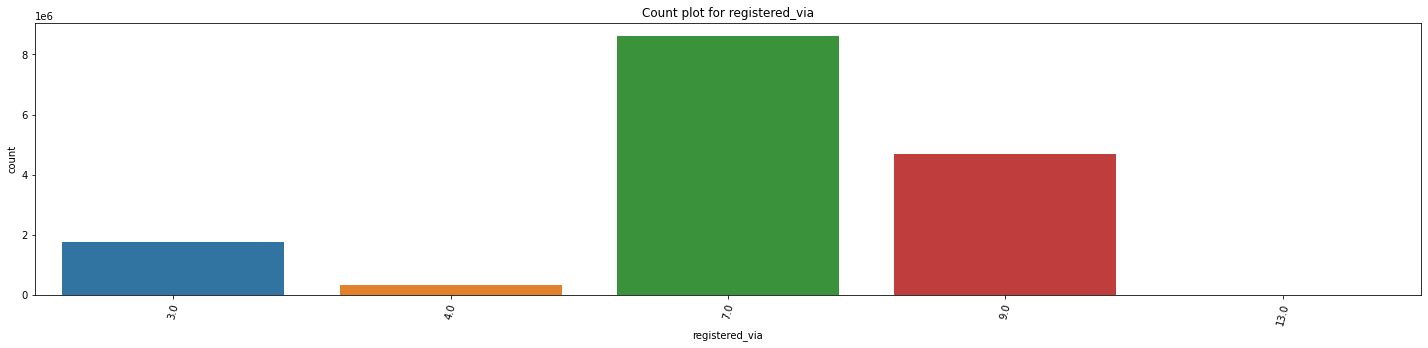

In [18]:
categorical_count_plots('registered_via')

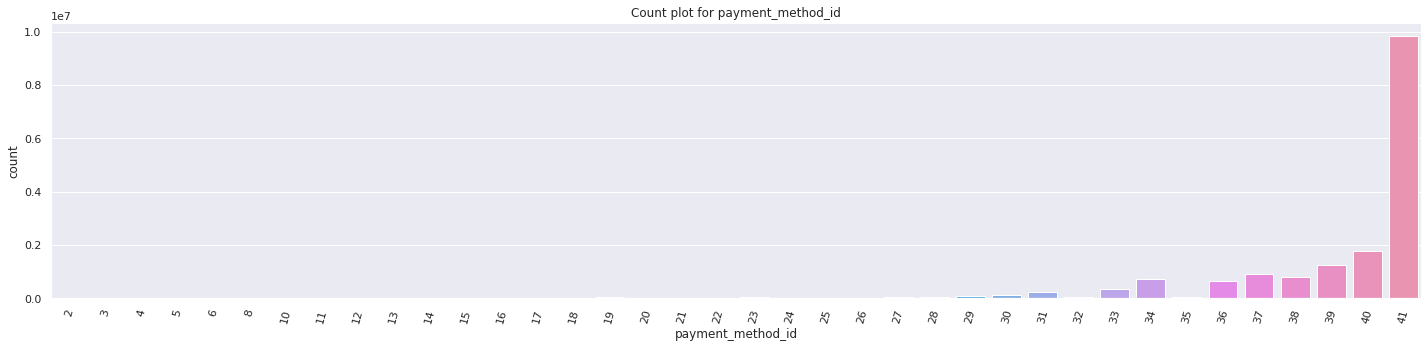

In [19]:
categorical_count_plots('payment_method_id')

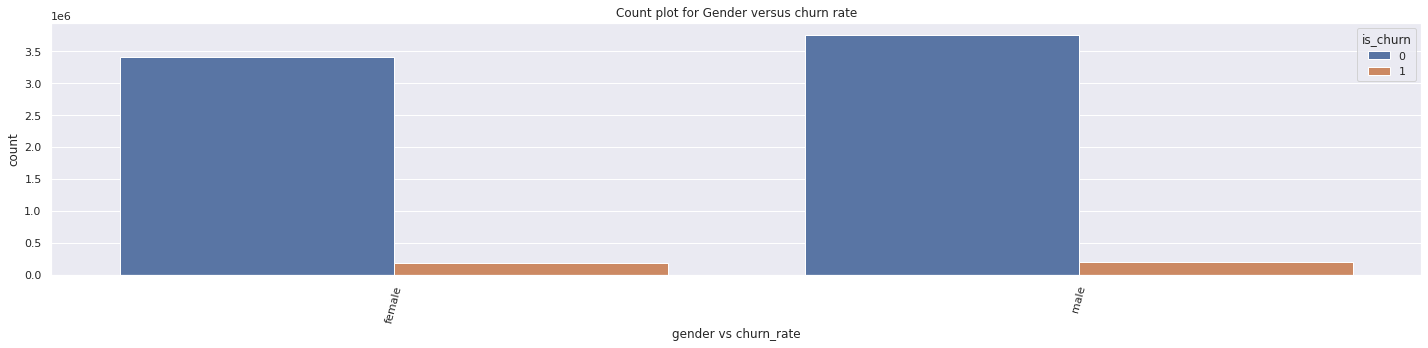

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(x='gender',hue='is_churn',data=finalMergeddata)
sns.set_theme(style="darkgrid")
plt.xlabel('gender vs churn_rate')
plt.ylabel('count')
plt.xticks(rotation='75')
plt.title('Count plot for '+'Gender versus churn rate')
plt.tight_layout()

In [9]:
import numpy as np
def preprocessing(data):
    # taking all registration_init_time feature and storing them to registration_time
    # but before going to do that, just impute median date in place of nan
    data['registration_init_time'] = data['registration_init_time'].fillna(20150204.0)
    
    registration_time = data['registration_init_time'].values   # getting registration_init_time array and store them to registration_time list
    
    data['city'] = data['city'].fillna(0)   # imputing 0 in place of nan values in the city column

    data['bd'] = data['bd'].apply(lambda x: x if (x < 72.0) and (x > 0.0) else np.nan) # removing outliers from Age
    data['bd'] = data['bd'].fillna(28.0)            # imputing 28 as age instead of nan

    data['gender'] = data['gender'].replace(to_replace='male', value=1)     # replacing male with 1 in gender
    data['gender'] = data['gender'].replace(to_replace='female', value=2)   # replacing male with 2 in gender
    data['gender'] = data['gender'].fillna(0)                               # replacing nan with 0 in gender
    data['registered_via'] = data['registered_via'].fillna(0)       # replace 0 instead of nan in registered_via

    data['registration_init_time'] = data['registration_init_time'].fillna(20150204.0)    # filling median date in place of nan in the df
    data['registration_init_time'] = pd.to_datetime(data['registration_init_time'], format='%Y%m%d')    # converting float date to datetime

    data['payment_method_id'] = data['payment_method_id'].fillna(0)   # imputing 0 in place of nan value in payment_method_id
    data['payment_plan_days'] = data['payment_plan_days'].apply(lambda x: x if (x <= 30.0) else np.nan)     # removing outliers
    data['payment_plan_days'] = data['payment_plan_days'].fillna(30.0)    # imputing 30 in place of nan in payment_plan_days

    data['plan_list_price'] = data['plan_list_price'].apply(lambda x: x if (x <= 180.0) else np.nan)# removing outliers
    data['plan_list_price'] = data['plan_list_price'].fillna(149.0)     # imputing 149 in place of nan in plan_list_price

    data['actual_amount_paid'] = data['actual_amount_paid'].apply(lambda x: x if (x <= 180.0) else np.nan)# removing outliers
    data['actual_amount_paid'] = data['actual_amount_paid'].fillna(149.0)# imputing 149 in place of nan in actual_amount_paid

    data['is_auto_renew'] = data['is_auto_renew'].fillna(2)       # imputing 2 in place of nan values in is_auto_renew

    data['transaction_date'] = data['transaction_date'].fillna(20170316.0)    # filling median date in place of nan in the df
    data['transaction_date'] = pd.to_datetime(data['transaction_date'], format='%Y%m%d')# converting float date to datetime

    data['membership_expire_date'] = data['membership_expire_date'].fillna(20170419.0)# filling median date in place of nan in the df
    data['membership_expire_date'] = pd.to_datetime(data['membership_expire_date'], format='%Y%m%d')# converting float date to datetime

    data['is_cancel'] = data['is_cancel'].fillna(2)# imputing 2 in place of nan values in is_cancel
    data['date'] = data['date'].fillna(20170316.0)# filling median date in place of nan in the df
    
    data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')# converting float date to datetime

    data['num_25'] = data['num_25'].apply(lambda x: x if (x <= 15.0) else np.nan)# removing outliers
    data['num_25'] = data['num_25'].fillna(2.0)# now I can impute 2 instead of nan in num_25

    data['num_50'] = data['num_50'].apply(lambda x: x if (x <= 4.0) else np.nan)# removing outliers
    data['num_50'] = data['num_50'].fillna(0)# now I can impute 0 instead of nan in num_50
    
    data['num_75'] = data['num_75'].apply(lambda x: x if (x <= 3.0) else np.nan)# removing outliers
    data['num_75'] = data['num_75'].fillna(0)# now I can impute 0 instead of nan in num_75
    
    data['num_985'] = data['num_985'].apply(lambda x: x if (x <= 3.0) else np.nan)# removing outliers
    data['num_985'] = data['num_985'].fillna(0)# now I can impute 0 instead of nan in num_985

    
    data['num_100'] = data['num_100'].apply(lambda x: x if (x <= 74.0) else np.nan)# removing outliers
    data['num_100'] = data['num_100'].fillna(14.0)# now I can impute 14 instead of nan in num_100

    data['num_unq'] = data['num_unq'].apply(lambda x: x if (x <= 68.0) else np.nan)# removing outliers    
    data['num_unq'] = data['num_unq'].fillna(16.0)# now I can impute 16 instead of nan in num_unq

    data['total_secs'] = data['total_secs'].apply(lambda x: x if (x <= 19167.549700000025) else np.nan)# removing outliers    
    data['total_secs'] = data['total_secs'].fillna(3880.765)# now I can impute 3880.765 instead of nan in total_secs
    
    return data, registration_time

In [10]:
data, registration_time = preprocessing(finalMergeddata.sample(10000))

In [13]:
def featurization(data):
    data['date'] = pd.to_datetime(data['date'], errors='coerce')# Feature - 1 (getting weekday from date)
    data['day_of_the_week'] = data['date'].dt.day_name().values
    
    data['is_weekend'] = data['day_of_the_week'].apply(lambda x: 1 if (x == 'Saturday') or (x == 'Sunday') else 0)# Feature - 2 (checking for the weekend)
    data['is_weekday'] = data['is_weekend'].apply(lambda x: 1 if (x == 0) else 0)# Feature - 3 (checking for the weekday)
    
    def std(x):
        return np.std(x)

    # grouping them together for train data
    temp_df = data.groupby('msno').agg(num_25_sum=('num_25', 'sum'),
                                    num_50_sum=('num_50', 'sum'),
                                    num_75_sum=('num_75', 'sum'),
                                    num_985_sum=('num_985', 'sum'),
                                    num_100_sum=('num_100', 'sum'),
                                    num_unq_sum=('num_unq', 'sum'),
                                    total_secs_sum=('total_secs', 'sum'),
                                    is_weekend_sum=('is_weekend', 'sum'),
                                    is_weekday_sum=('is_weekday', 'sum'),
                                    num_25_mean=('num_25', 'mean'),
                                    num_50_mean=('num_50', 'mean'),
                                    num_75_mean=('num_75', 'mean'),
                                    num_985_mean=('num_985', 'mean'),
                                    num_100_mean=('num_100', 'mean'),
                                    num_unq_mean=('num_unq', 'mean'),
                                    total_secs_mean=('total_secs', 'mean'),
                                    num_25_std=('num_25', std),
                                    num_50_std=('num_50', std),
                                    num_75_std=('num_75', std),
                                    num_985_std=('num_985', std),
                                    num_100_std=('num_100', std),
                                    num_unq_std=('num_unq', std),
                                    total_secs_std=('total_secs', std),
                                    active_days=('date', 'nunique'),
                                    date_min=('date', 'min'),
                                    date_max=('date', 'max'),
                                    payment_plan_days_mean=('payment_plan_days', 'mean'),
                                    plan_list_price_mean=('plan_list_price', 'mean'),
                                    actual_amount_paid_mean=('actual_amount_paid', 'mean'),
                                    transaction_date_count=('transaction_date', 'nunique'),
                                    transaction_date_max=('transaction_date', 'max'),
                                    membership_expire_date_max=('membership_expire_date', 'max'),
                                    membership_expire_count=('membership_expire_date', 'nunique'))
    # merging them with the train dataset
    data = pd.merge(data, temp_df, on='msno', how='left')
    
    # Feature - 38 (activity period)
    data['date_min'] = pd.to_datetime(data['date_min'], errors='coerce')
    data['date_max'] = pd.to_datetime(data['date_max'], errors='coerce')
    
    data['activity_period'] = (data['date_max'] - data['date_min']).dt.days + 1
    
    # Feature - 39 (inactive days)
    data['inactive_days'] = data['date'].nunique() - data['active_days']
    
    # Feature - 40 (rare behaviour)
    # 0 (for not rare user) and 1 (for rare user)
    data['is_rare'] = data['active_days'].apply(lambda x: 0 if (x > 1) else 1)
    
    # Feature - 41 (average time per day)
    data['avg_time_perday'] = data['total_secs_sum'] / data['active_days']

    # Feature - 42 (unique tracks played per day)
    data['unq_track_perday'] = round(data['num_unq_sum'] / data['active_days'])

    # Feature - 43 (tracks played till 25% length per day)
    data['till_25_perday'] = round(data['num_25_sum'] / data['active_days'])

    # Feature - 44 (tracks played till 50% length per day)
    data['till_50_perday'] = round(data['num_50_sum'] / data['active_days'])

    # Feature - 45 (tracks played till 75% length per day)
    data['till_75_perday'] = round(data['num_75_sum'] / data['active_days'])

    # Feature - 46 (tracks played till 98.5% length per day)
    data['till_985_perday'] = round(data['num_985_sum'] / data['active_days'])

    # Feature - 47 (tracks played till 100% length per day)
    data['till_full_perday'] = round(data['num_100_sum'] / data['active_days'])
    
    # Feature - 48 (discount)
    data['discount'] = data['plan_list_price'] - data['actual_amount_paid']    
    # since there can be several values which are less than 0 for various reasons
    # so it's always good to set a lower limit, here I can set 0
    data['discount'] = data['discount'].clip(lower=0)
    
    # Feature - 49 (is_discount)
    data['is_discount'] = data['discount'].apply(lambda x: 1 if (x > 0) else 0)
    
    # Feature - 50 (days since final login)
    # Threshold that I set here is the last date, which is 31-03-2017
    data['days_since_last_login'] = (pd.to_datetime(data['date'].unique().max(), errors='coerce') - data['date_max']).dt.days
    
    # Feature - 51 (days left)
    data['membership_expire_date_max'] = pd.to_datetime(data['membership_expire_date_max'], errors='coerce')
    data['days_left'] = (data['membership_expire_date_max'] - pd.to_datetime(data['date'].unique().max(), errors='coerce')).dt.days
    
    # Since there are many negative values so I can set them to 0
    data['days_left'] = data['days_left'].clip(lower=0)
    
    # Feature - 52 (Loyality range)
    data['transaction_date_max'] = pd.to_datetime(data['transaction_date_max'], errors='coerce')
    data['registration_init_time'] = pd.to_datetime(data['registration_init_time'], errors='coerce')
    data['layality_range'] = (data['transaction_date_max'] - data['registration_init_time']).dt.days
    
    # Feature - 53 (price per day)
    data['Perday_price'] = data['actual_amount_paid'] / data['payment_plan_days']
    
    # Feature - 54 (days since final transaction)
    data['days_since_final_transaction'] = (pd.to_datetime(data['date'].unique().max(), errors='coerce') - data['transaction_date_max']).dt.days
    
    return data

In [14]:
finalFeaturized = featurization(finalMergeddata)

In [18]:
def prepare_data(data, registration_date):
    
    # removing all non_useful features first
    data = data.drop(['registration_init_time',
                                  'transaction_date', 
                                  'membership_expire_date', 
                                  'date', 
                                  'num_25',
                                  'num_50',
                                  'num_75',
                                  'num_985',
                                  'num_100',
                                  'num_unq',
                                  'total_secs',
                                  'is_weekend',
                                  'is_weekday',
                                  'day_of_the_week'], axis=1, inplace=False)
    
    # creating new feature, and adding it to train dataset
    data['registration_init_time'] = registration_date
    
    # removing all duplicate rows for a particular id
    data = data.drop_duplicates('msno', keep='first', inplace=False)
    
    return data

In [19]:
finalFeatureEngineeredData = prepare_data(data, registration_time)

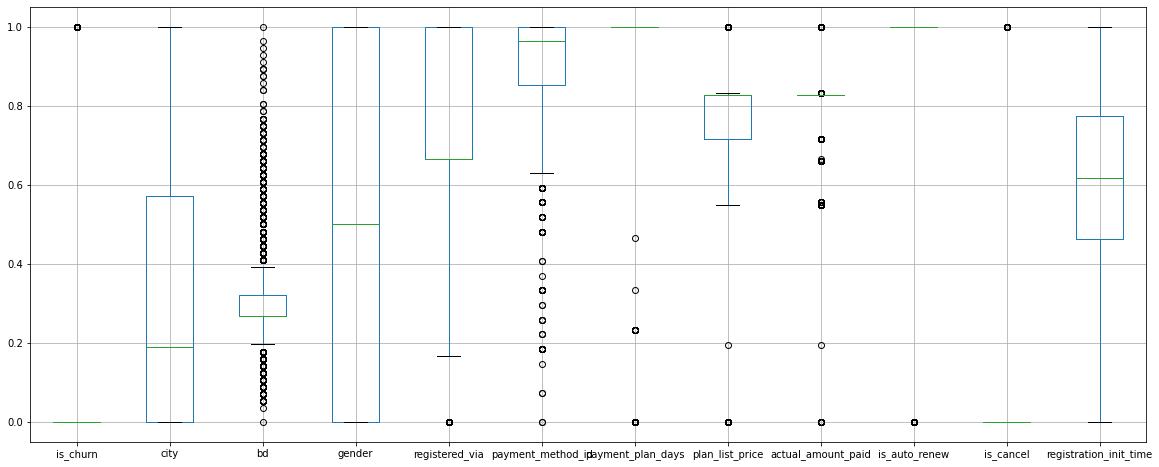

In [41]:
finalNormData1.boxplot(figsize=(20,8))

In [21]:
def normalize(data):    
    result1 = data.copy()
    for feature_name in data.columns:
        if (str(feature_name) != str('msno') and str(feature_name)!=str('is_churn')):
            max_value = data[feature_name].max()
            min_value = data[feature_name].min()
            result1[feature_name] = (data[feature_name] - min_value) / (max_value - min_value)
    return result1

In [23]:
finalNormData1 = normalize(finalFeatureEngineeredData)

In [27]:
finalNormData1 = finalNormData1.drop(['msno'], axis=1)

In [28]:
from sklearn.model_selection import train_test_split
Y_train = finalNormData1['is_churn']
X_train = finalNormData1.drop(['is_churn'],axis=1)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train,test_size=0.20, random_state=42) #80-20

clf = DecisionTreeClassifier(random_state=42,max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

In [ ]:
from sklearn.ensemble import LogisticRegression
logClf = LogisticRegression(n_estimators=100, random_state=0)

chunk_size=50000
batch_no=1
row_size = 0
for chunk in pd.read_csv('./all_data/user_logs.csv',chunksize=chunk_size):
  chunk.join(trainMembTrasactionscsv.set_index('msno'),'msno',how='inner')
  row_size = row_size + chunk.shape[0]
  batch_no+=1
  del chunk
print(batch_no)
print(row_size)

y_test_predict = logClf.predict(x_test)
kaggleop1['is_churn'] = pd.DataFrame(y_test_predict)

In [ ]:
logClf.fit(x_train, y_train)

In [42]:
finalNormData1.corr(method='pearson')

,is_churn,city,bd,gender,registered_via,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,registration_init_time
is_churn,1.000000,0.016833,-0.034307,0.005905,-0.019068,-0.045651,0.027065,0.042649,0.012002,-0.238630,-0.001321,0.057459
city,0.016833,1.000000,0.152921,0.542892,0.115979,-0.296663,-0.072046,0.136355,0.322563,-0.080981,0.010355,-0.314217
bd,-0.034307,0.152921,1.000000,0.191124,0.214444,-0.146598,-0.074244,-0.021192,0.085351,0.203390,-0.027064,-0.280389
gender,0.005905,0.542892,0.191124,1.000000,0.146008,-0.344776,-0.073105,0.160175,0.373409,-0.126365,0.000102,-0.409452
registered_via,-0.019068,0.115979,0.214444,0.146008,1.000000,-0.179467,-0.080167,-0.034270,0.066588,0.167500,0.009096,-0.501440
payment_method_id,-0.045651,-0.296663,-0.146598,-0.344776,-0.179467,1.000000,0.211071,-0.015808,-0.326338,0.225695,0.051504,0.364098
payment_plan_days,0.027065,-0.072046,-0.074244,-0.073105,-0.080167,0.211071,1.000000,0.839934,0.006500,-0.029136,0.031215,0.161681
plan_list_price,0.042649,0.136355,-0.021192,0.160175,-0.034270,-0.015808,0.839934,1.000000,0.487635,-0.138230,0.045318,-0.046271
actual_amount_paid,0.012002,0.322563,0.085351,0.373409,0.066588,-0.326338,0.006500,0.487635,1.000000,-0.141449,0.020652,-0.326426
is_auto_renew,-0.238630,-0.080981,0.203390,-0.126365,0.167500,0.225695,-0.029136,-0.138230,-0.141449,1.000000,0.045759,-0.090069


In [36]:
lrclassify = LogisticRegression()
lrclassify.fit(x_train,y_train)

y_test_predict = lrclassify.predict(x_test)
kaggleop2 = pd.DataFrame(y_test_predict)

In [37]:
kaggleop2['is_churn'] = pd.DataFrame(y_test_predict)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gradientBoostclf = GradientBoostingClassifier(n_estimators=100, random_state=0)
gradientBoostclf.fit(x_train, y_train)
y_test_predict = gradientBoostclf.predict(x_test)
kaggleop3 = pd.DataFrame(y_test_predict)
kaggleop3['is_churn'] = pd.DataFrame(y_test_predict)

In [ ]:
kaggleop3.to_csv('./all_data/my_submission_xgb.csv',index=False)